<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/Decision_Trees_%26_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees & Random Forests**

We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests: 

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(at least two parameters). 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use a random forest then change the number of estimators.

6. Calculate the new accuracy and compare it with the previous result.

In [ ]:
from google.colab import drive # import google colab 
drive.mount('/gdrive') # importer google drive 

Mounted at /gdrive


Apportons notre dataset du titanic après la phase de prépocessing du checkpoint  de data prerpocessing et data visualization

In [147]:
# chemin du fichier 
dataPath = '/gdrive/MyDrive/Gomycode /Introduction a IA /cours6/checkpoint/titanicPreprocessing.csv'

Dataset Titanic 

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv(dataPath)
df.head()

Unnamed: 0  Survived  Pclass  Sex   Age     Fare Title  FamilySize
0           0         0       2    1  28.0  13.0000   Mrs           0
1           1         0       3    1  25.0   7.6500   Mrs           0
2           2         0       3    1  20.0   7.8542   Mrs           0
3           3         0       3    0  29.0  21.0750   Mrs           4
4           4         0       1    1  31.0  52.0000   Mrs           1

## preparing data

In [150]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()

Survived  Pclass  Sex   Age     Fare Title  FamilySize
0         0       2    1  28.0  13.0000   Mrs           0
1         0       3    1  25.0   7.6500   Mrs           0
2         0       3    1  20.0   7.8542   Mrs           0
3         0       3    0  29.0  21.0750   Mrs           4
4         0       1    1  31.0  52.0000   Mrs           1

In [151]:
df.Title.value_counts() 

Mrs         643
Miss        185
Master       40
Officer      18
Royalty       4
Royality      1
Name: Title, dtype: int64

In [152]:
dict_Title ={
  "Mrs" : 2,       
  "Miss" : 1,      
  "Master"  : 0,    
  "Officer" : 3,     
  "Royalty" : 5,      
  "Royality"  : 4      
}

In [ ]:
df.Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

In [153]:
dict_Survived ={
  "Survied" : 1,       
  "Died" : 0,         
}

# LabelEncoder 

In [154]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df.Title = labelencoder.fit_transform(df.Title)
df.Title.value_counts() 

2    643
1    185
0     40
3     18
5      4
4      1
Name: Title, dtype: int64

# Training set and a testing set 

Importer **train_test_split**  depuis sklearn

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
#features extraction
x= df[["Pclass", "Sex","Age","Fare","Title", "FamilySize"]]
y= df["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

# Apply Decesion Tree

Importer **DecisionTreeClassifier** and **accuracy_score** depuis sklearn

In [157]:
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [158]:
#applying tree algorithm
treeClassifier = tree.DecisionTreeClassifier()  
print("Modèle de Decision Tree... \n")
treeClassifier.fit(x_train, y_train)   #fitting our model
y_pred=treeClassifier.predict(x_test)   # evaluating our model
print("Accuracy score = {}".format(accuracy_score(y_test, y_pred)))

Modèle de Decision Tree... 

Accuracy score = 0.7877094972067039


# Plot your decision tree and try to read the tree branches and conclude a prediction manually.

## export_text
essayons de visuaiser avec la méthode export_text de tree

In [159]:
text_representation = tree.export_text(treeClassifier)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_3 <= 26.12
|   |   |   |   |--- feature_2 <= 55.50
|   |   |   |   |   |--- feature_2 <= 27.50
|   |   |   |   |   |   |--- feature_2 <= 25.50
|   |   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |   |   |--- feature_5 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_5 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  25.50
|   |   |   |   |   |   |   |--- feature_3 <= 15.75
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  15.75
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  27.50
|   |   |   |   |   |   |--- feature_3 <= 25.9

In [160]:
features = ["Pclass", "Sex","Age","Fare","Title", "FamilySize"]
target = ["Survived", "Died"]

## plot_tree
Visualisons ave **plot_tree**  de tree

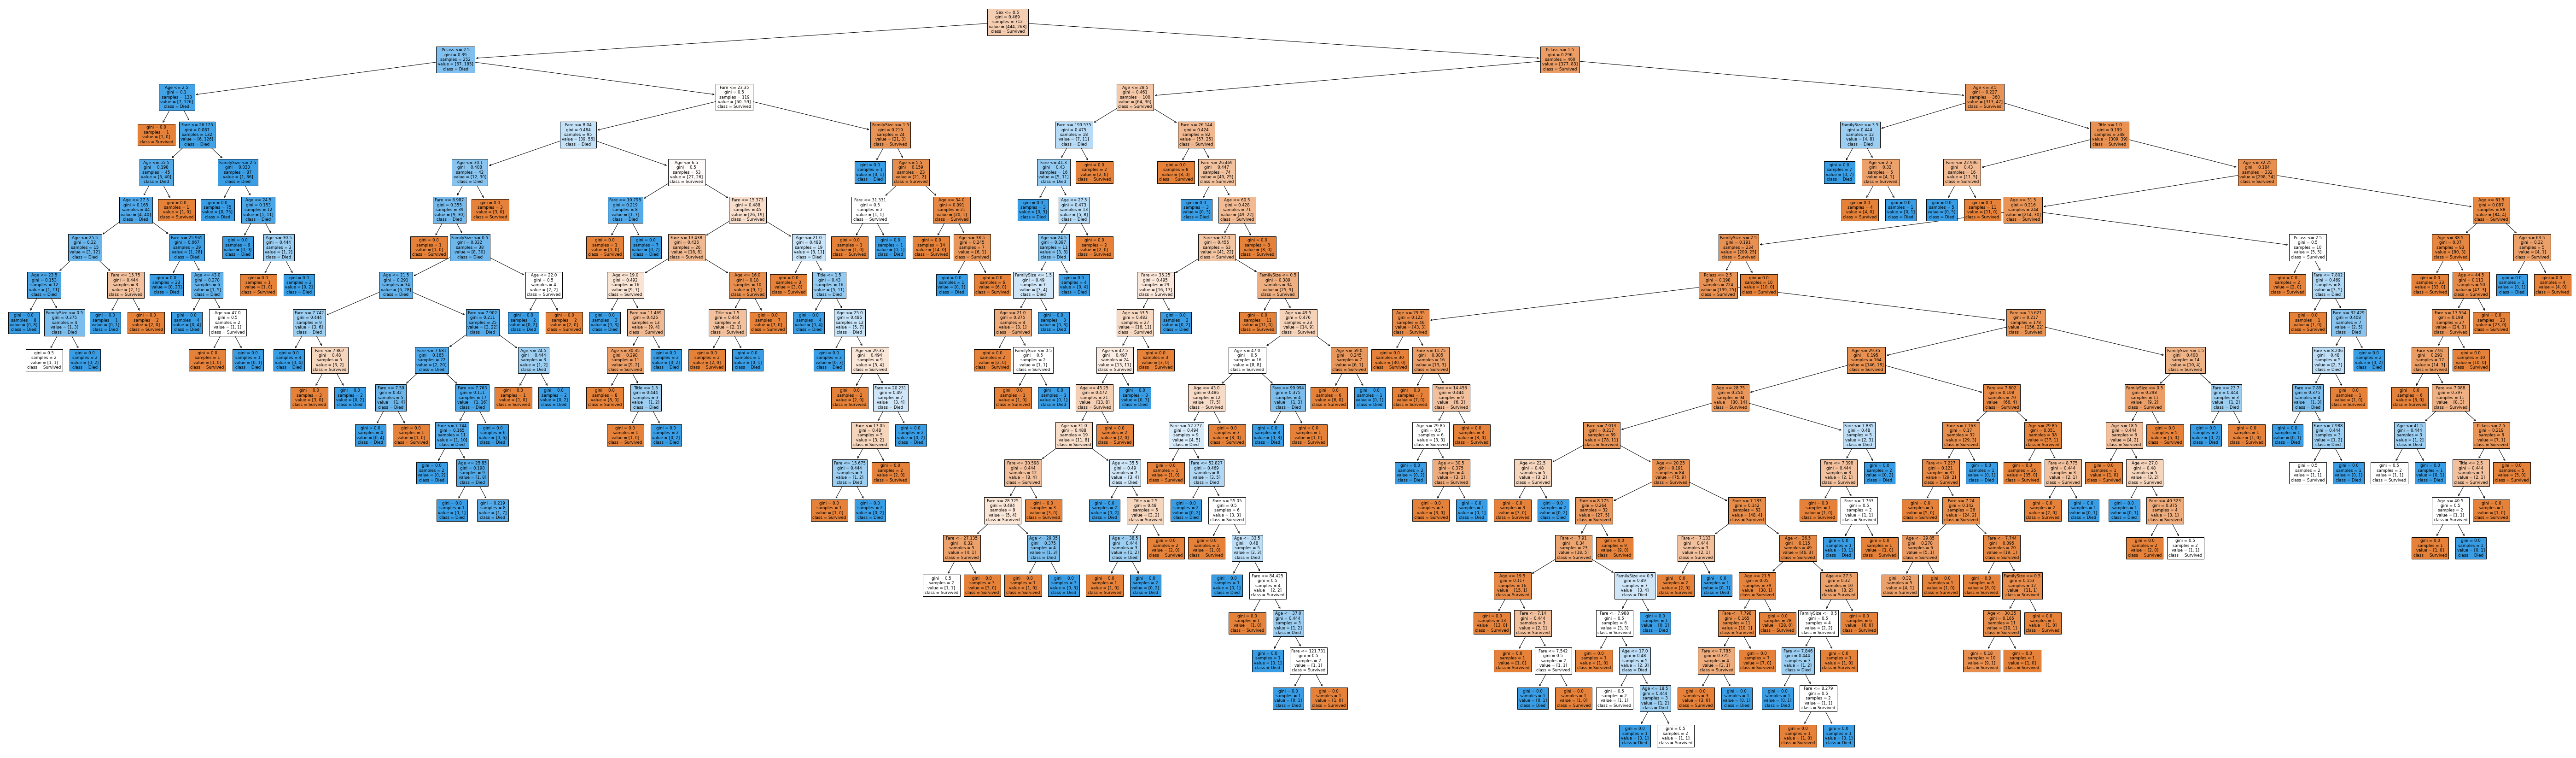

In [161]:
fig = plt.figure(figsize=(100,30))
graph=tree.plot_tree(treeClassifier, 
                   feature_names=features,  
                   class_names=target,
                   filled=True)

sauvegar la figure en png 


In [ ]:
fig.savefig("decistion_tree_with_plot_tree.png")

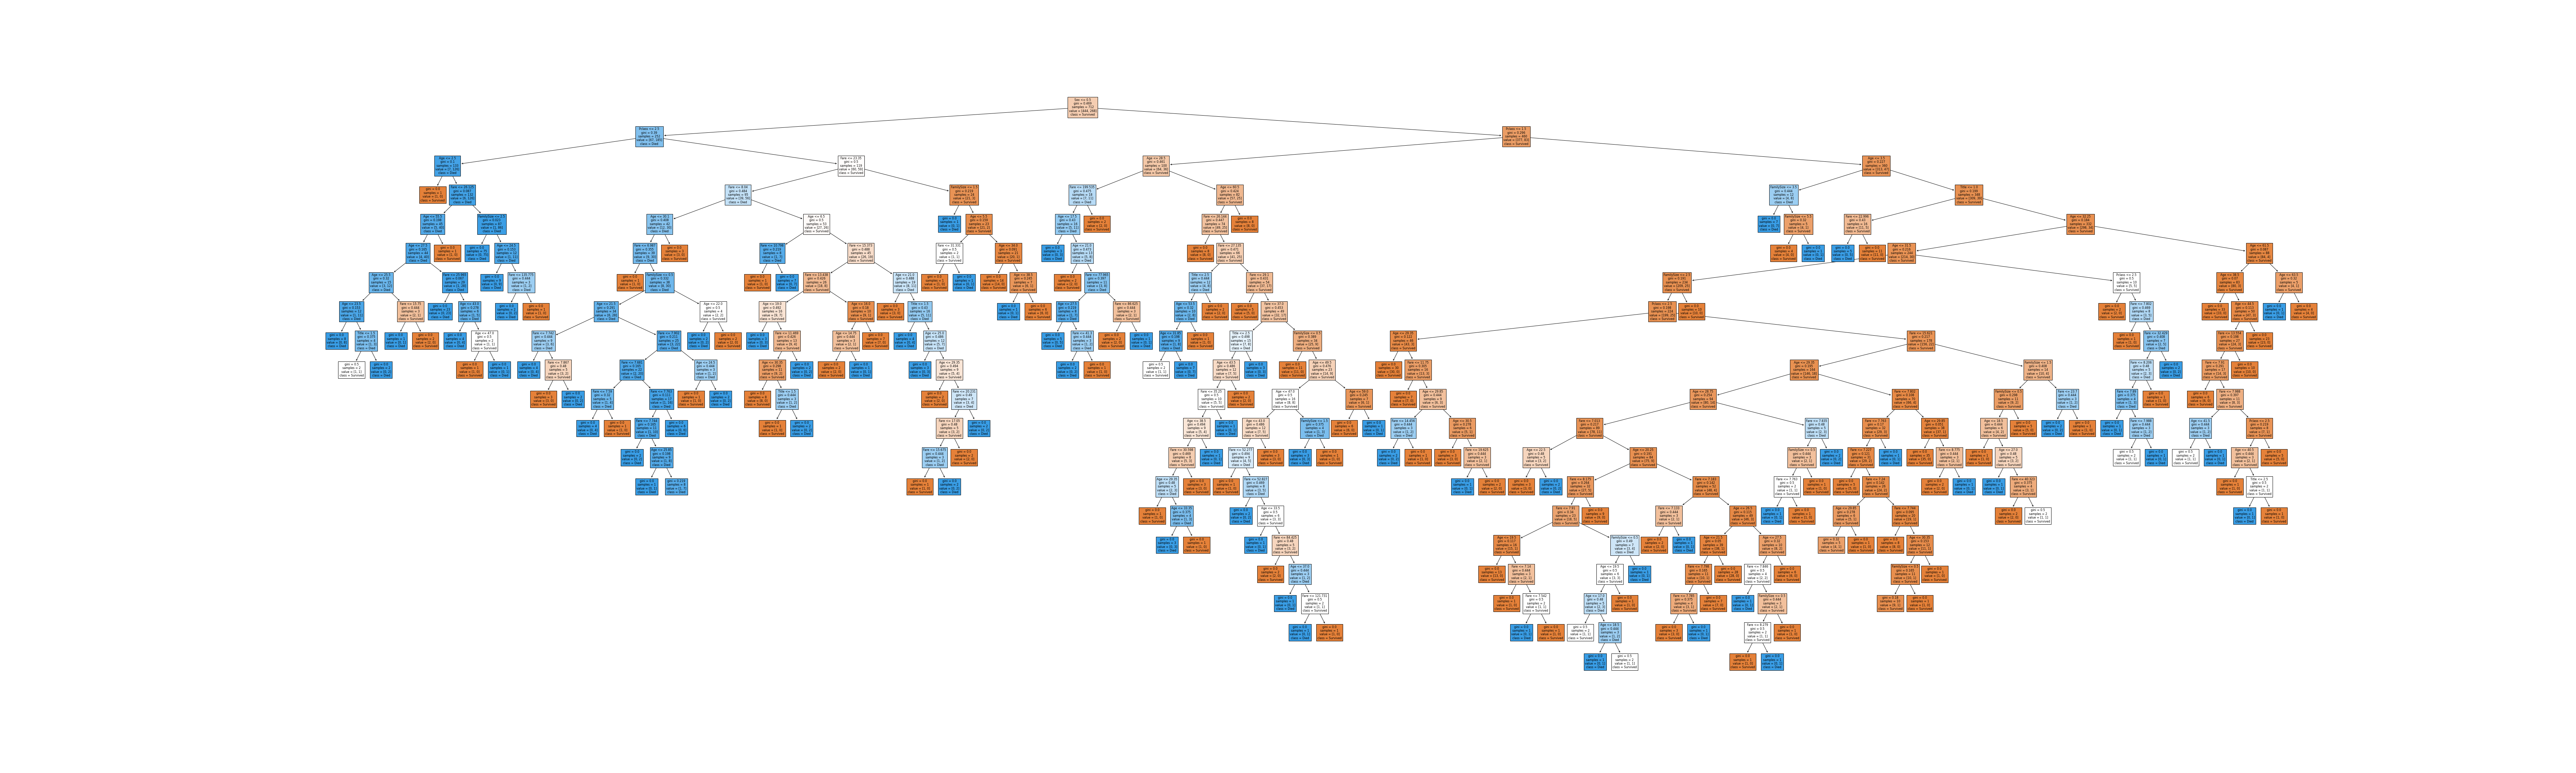

cliker sur [image](https://github.com/lmlouis/IntroductionIA/blob/main/decistion_tree_with_plot_tree.png) pour voir le graph

## dtreeviz 
install package with : 
```
pip install  dtreeviz

```

In [162]:
pip install  dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(treeClassifier, x, y,
                target_name="Survived",
                feature_names=features,
                class_names=list(target))

viz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


sauvegarder en format svg 

In [ ]:
viz.save("decision_tree.svg") 

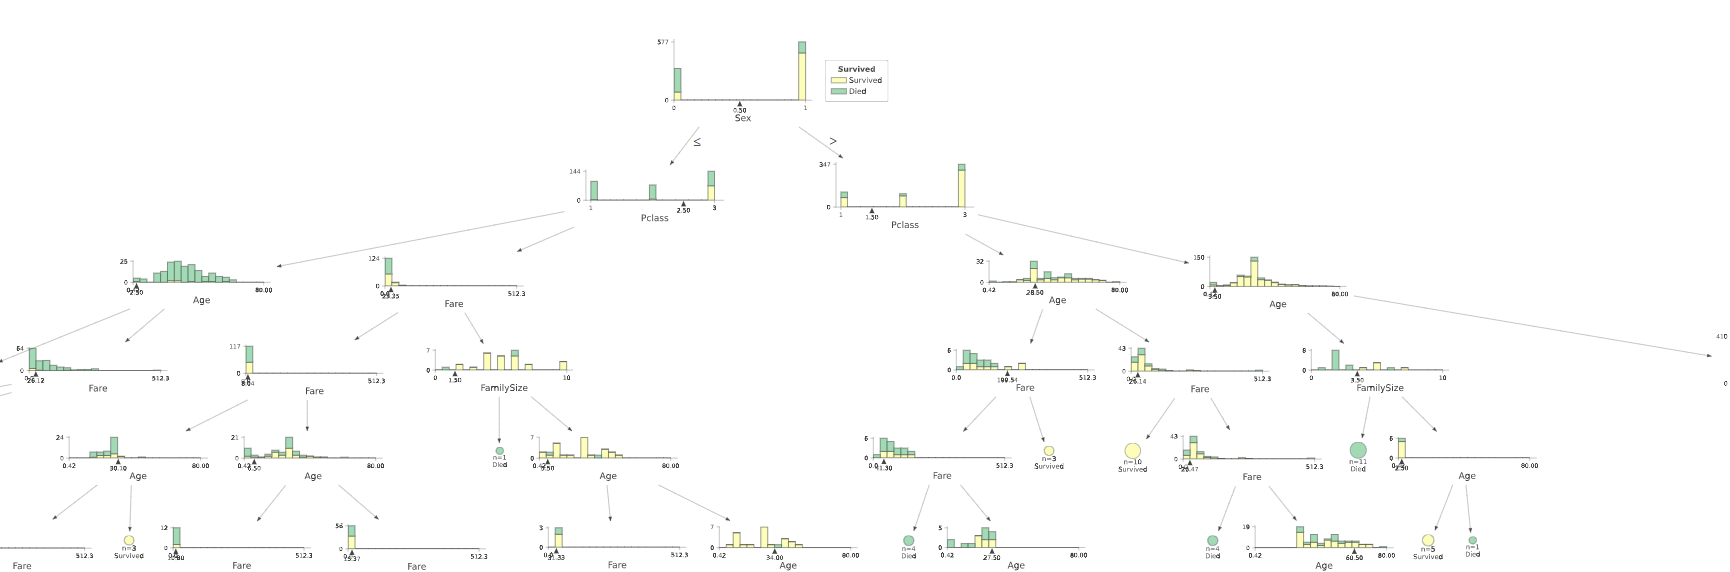

# Interpretation 

le **root node** : Sex

le **internal node** : Pclass,  Age , Fare, Title , FamilySize

les **leaf node** : Survived et Died 

Prennons le scénario de la plus pétite branche :

Si le Sexe est feminin, Pclass ={ 0, 1, 2} et age <= 2 ans  alors il survit


# Decision tree parameters(at least two parameters).

on choisi faire notre modème avec 2 critères de prédiction : Sexe et Fare

In [168]:
x_2 = df[["Fare", "Sex"]]

In [169]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x_2,y, test_size=0.20,random_state=10)

#applying tree algorithm
treeClassifier = tree.DecisionTreeClassifier()  
print("Modèle de Decision Tree... \n")
treeClassifier.fit(x_train, y_train)   #fitting our model
y_pred=treeClassifier.predict(x_test)   # evaluating our model
print("Accuracy score = {}".format(accuracy_score(y_test, y_pred)))

Modèle de Decision Tree... 

Accuracy score = 0.8100558659217877


# Compare accuracy Result 

Avec les parèmtres Fare et Sex on est passé d'un score 78% à celui 81%

Text(0.5, 1.0, 'Accuracy comparaison')

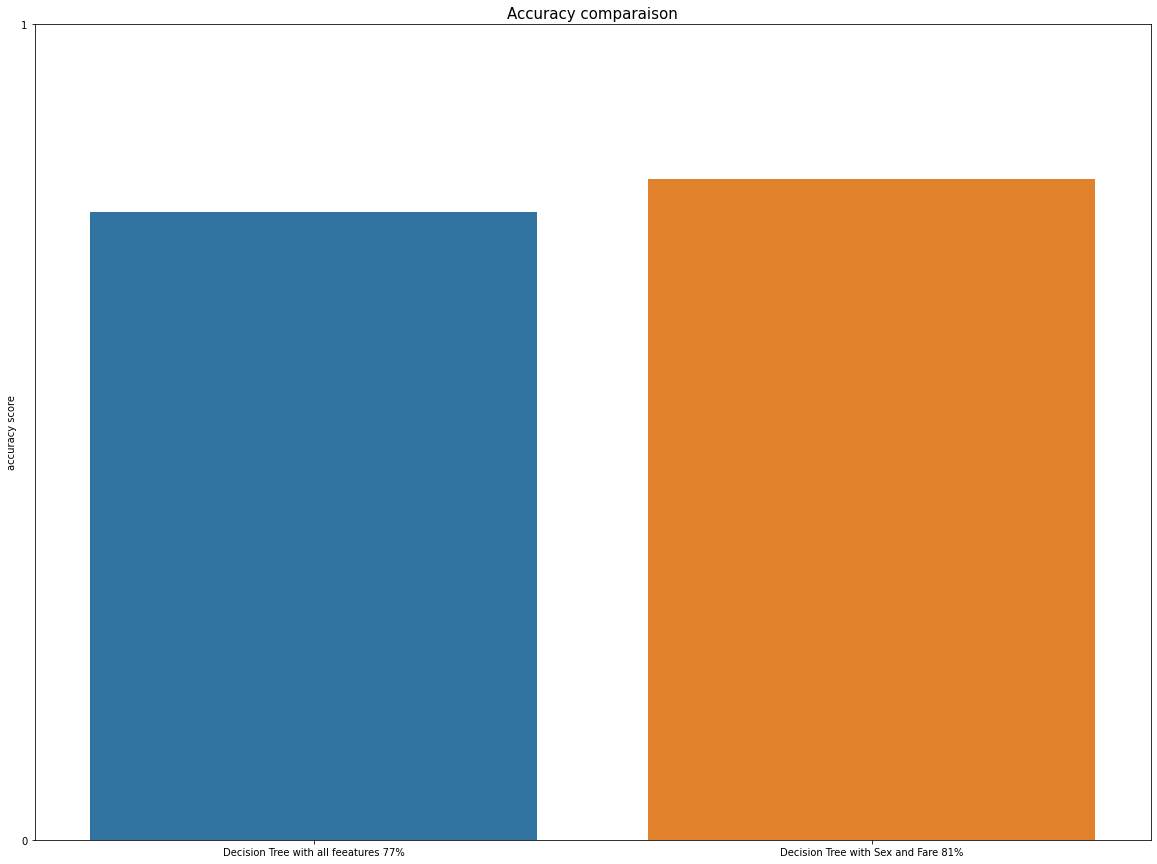

In [310]:
dict_score = {'Decision Tree with all feeatures 77%': [0.77], 'Decision Tree with Sex and Fare 81%': [0.81]}
accuray_df = pd.DataFrame(data=dict_score)
plt.figure(figsize=(20,15))
sns.barplot(data=accuray_df)
plt.ylabel('accuracy score')
plt.yticks([0,1])
plt.title("Accuracy comparaison", fontsize=15)

# Random forest 
nombre d'estimations on prendra 1000

In [297]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier

# Random Forest Prediction

In [302]:
RandomForest=RandomForestClassifier(n_estimators=1000)  # Creating a random forest with 100 decision trees
RandomForest.fit(x_train, y_train)  # Training our model
y_pred=RandomForest.predict(x_test)  # testing our model
print("Accuracy:", accuracy_score(y_test, y_pred))  # Measuring the accuracy of our model

Accuracy: 0.8507462686567164


Text(0.5, 1.0, 'Accuracy comparaison')

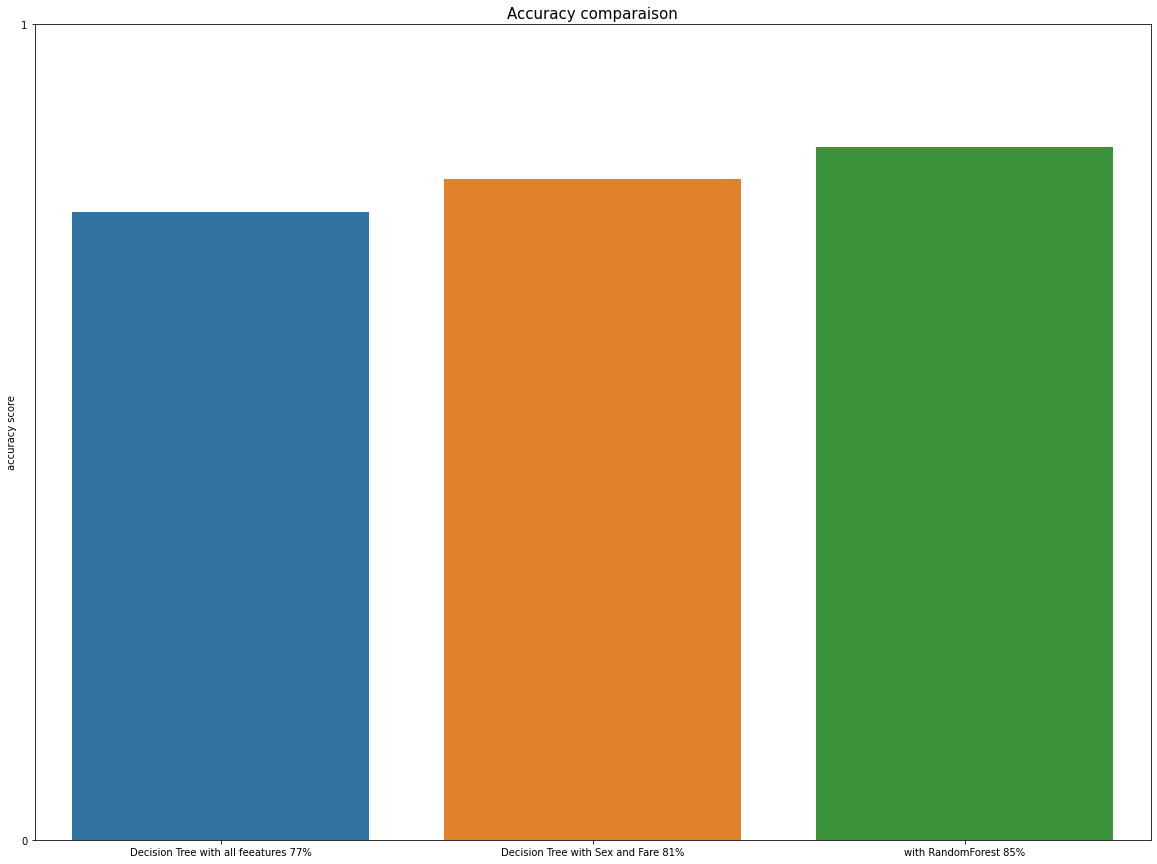

In [311]:
accuray_df['with RandomForest 85%'] = [0.85]
accuray_df

plt.figure(figsize=(20,15))
sns.barplot(data=accuray_df)
plt.ylabel('accuracy score')
plt.yticks([0,1])
plt.title("Accuracy comparaison", fontsize=15)

# Conclusion 

Avec le Décision Tree on à un bon meilleurs score lorsqu'on retire quelques critères de prédiction ( de 77 à 81%) mais le Random Forest est meilleur avec 1000 estimations 85% 